# WS 2.3: Discrete Fourier Transform (DFT): You Try Meow (Miauw)

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.3, Signal Processing. For: November 27, 2024*

The goal of this workshop to work with the _Discrete Fourier Transform_ (DFT), implemented in Python as the _Fast Fourier Transform_ (FFT) through `np.fft.fft`, and to understand and interpret its output.

The notebook consists of two parts:
- The first part (Task 0) is a demonstration of the use of the DFT (_you read and execute the code cells_),
- The second part is a simple exercise with the DFT (_you write the code_).

To start off, let's do a quick quiz question: _what is the primary purpose of the DFT?_

_Find the answer [here](https://tudelft.h5p.com/content/1292126914399042257/embed)._

That's right! We convert our signal into the frequency domain. And if you would like an additional explanation of the key frequencies, you can find it [here](https://medium.com/@kovalenko.alx/fun-with-fourier-591662576a77).

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note the use of <code>zip</code>, <code>stem</code>, <code>annotate</code> and the modulo operator
<code>%</code>. Refer to PA11 if you do not understand these tools. Furthermore, note that the term _modulus_ is also used here (and in the textbook), which is another term for _absolute value._</p></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Task 0: Demonstration of DFT using pulse function

In the first part of this notebook, we use  $x(t)=\Pi(\frac{t}{4})$, and its Fourier transform $X(f)=4 \,\textrm{sinc}(4f)$, as an example (see the first worked example in Chapter 3 on the Fourier transform). The pulse lasts for 4 seconds in the time domain; for convenience, below it is not centered at $t$ = 0, but shifted (delayed) to the right.

The signal $x(t)$ clearly is non-periodic and is an energy signal; apart from a short time span of 'activity' it is zero elsewhere.

We create a pulse function $x(t)$ in discrete time $x_n$ by numpy. The total signal duration is $T$ = 20 seconds (observation or record length). The sampling interval is $\Delta t$ = 1 second. There are $N$ = 20 samples, and each sample represents 1 second, hence $N \Delta t = T$.

Note that the time array starts at $t$ = 0 s, and hence, the last sample is at $t$ = 19 s (and not at $t$ = 20 s, as then we would have 21 samples).

### Task 0.1: Visualize the Signal

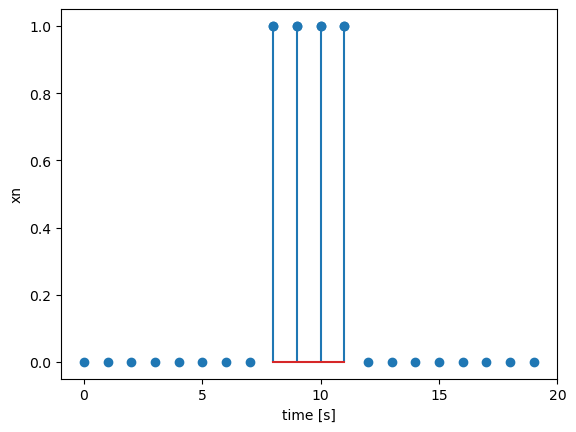

In [2]:
t = np.arange(0,20,1)
xt = np.concatenate((np.zeros(8), np.ones(4), np.zeros(8)))

plt.plot(t, xt,'o')
plt.stem(t[8:12], xt[8:12]) 
plt.xticks(ticks=np.arange(0,21,5), labels=np.arange(0,21,5))
plt.xlabel('time [s]')
plt.ylabel('xn');

### Task 0.2: Evaluate (and visualize) the DFT

We use `numpy.fft.fft` to compute the one-dimensional Discrete Fourier Transform (DFT) of $x_n$, which takes a signal as argument and returns an array of coefficients (refer to the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) as needed).

The DFT converts $N$ samples of the time domain signal $x_n$, into $N$ samples of the frequency domain. In this case, it produces $X_k$ with $k = 0, 1, 2, \ldots, N-1$, with $N$ = 20, which are complex numbers. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 0.2:</b>   
Read the code cell below before executing it and identify the following:
<ol>
    <li>Where is the DFT computed, and what is the output?</li>
    <li>Why is the modulus (absolute value) used on the DFT output?</li>
    <li>What are the values are used for the x and y axes of the plot?</li>
    <li>How is frequency information found and added to the plot (mathematically)?</li>
</ol>
Once you understand the figure, continue reading to understand <em>what do these 20 complex numbers mean, and how should we interpret them?</em>
</p>
</div>

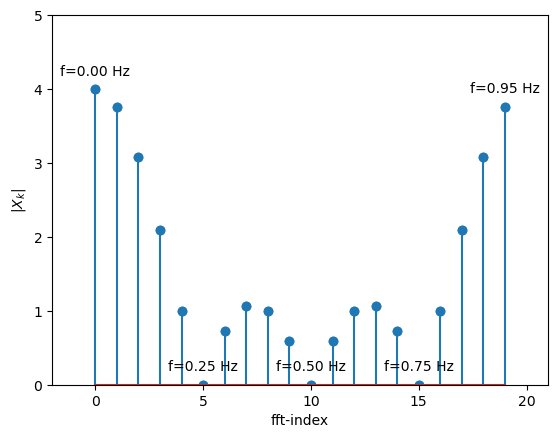

In [3]:
abs_fft = np.abs(np.fft.fft(xt))
index_fft = np.arange(0,20,1)
plt.plot(index_fft, abs_fft, 'o')

freq = np.arange(0, 1, 0.05)
for x,y in zip(index_fft, abs_fft):
    if x%5 == 0 or x==19:
        label = f"f={freq[x]:.2f} Hz"
        plt.annotate(label, 
                     (x,y),
                     textcoords="offset points", 
                     xytext=(0,10),
                     fontsize=10,
                     ha='center') 
plt.ylim(0,5)
plt.xlim(-2,21)
plt.xlabel('fft-index')
plt.ylabel('$|X_k|$')
plt.stem(index_fft, abs_fft);

The frequency resolution $\Delta f$ equals one-over-the-measurement-duration, hence $\Delta f = 1/T$. With that knowledge, we can reconstruct the frequencies expressed in Hertz.

The spectrum of the sampled signal is periodic in the sampling frequency $f_s$ which equals 1 Hz ($\Delta t$ = 1 s). Therefore, it is computed just for one period $[0,f_s)$. The last value, with index 19, represents the component with frequency $f$ = 0.95 Hz. A spectrum is commonly presented and interpreted as double-sided, so in the above graph we can interpret the spectral components with indices 10 to 19 corresponding to negative frequencies. 

### Task 0.3: Identify negative frequencies

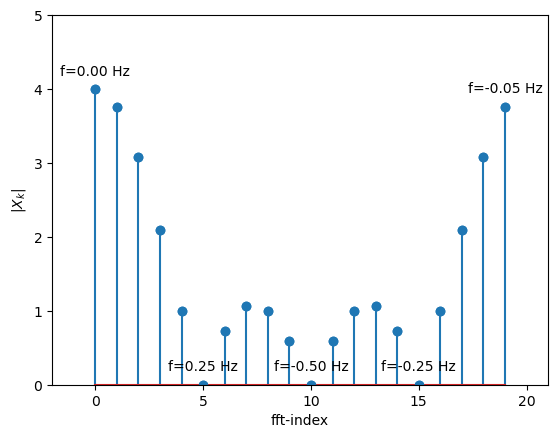

In [4]:
abs_fft = np.abs(np.fft.fft(xt))
plt.stem(index_fft, abs_fft)
plt.plot(index_fft, abs_fft, 'o')

freq = np.concatenate((np.arange(0, 0.5, 0.05), np.arange(-0.5, 0, 0.05)))
for x,y in zip(index_fft, abs_fft):
    if x%5 == 0 or x==19:
        label = f"f={freq[x]:.2f} Hz"
        plt.annotate(label, 
                     (x,y),
                     textcoords="offset points", 
                     xytext=(0,10),
                     fontsize=10,
                     ha='center') 
plt.ylim(0,5)
plt.xlim(-2,21)
plt.xlabel('fft-index')
plt.ylabel('$|X_k|$');

Now we can interpret the DFT of the $x(t)=\Pi(\frac{t}{4})$. The sampling interval is $\Delta t$ = 1 second, and the obsesrvation length is T=20 seconds, and we have N=20 samples.  
- We can recognize a bit of a sinc function.
- The DFT is computed from 0 Hz, for positive frequencies up to $\frac{fs}{2} = 0.5$ Hz, after which the negative frequencies follow from -0.5 to -0.05 Hz.
- $X(f)=4 \textrm{sinc}(4f)$ has its first null at $f=0.25$Hz.

### Task 0.4: Create symmetric plot

For convenient visualization, we may want to explicitly shift the negative frequencies to the left-hand side to create a symmetric plot. We can use `numpy.fft.fftshift` to do that. In other words, the zero-frequency component appears in the center of the spectrum. Now, it nicely shows a symmetric sprectrum. It well resembles the sinc-function (taking into account that we plot the modulus/absolute value). The output of the DFT still consists of $N$ = 20 elements. To enable this, we set up a new frequency array (in Hz) on the interval $[-fs/2,fs/2)$.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 0.4:</b>   
Read the code cell below before executing it and identify how the plot is modified based on the (new) specification of frequency. Note that it is more than just the <code>freq</code> variable!
</p>
</div>

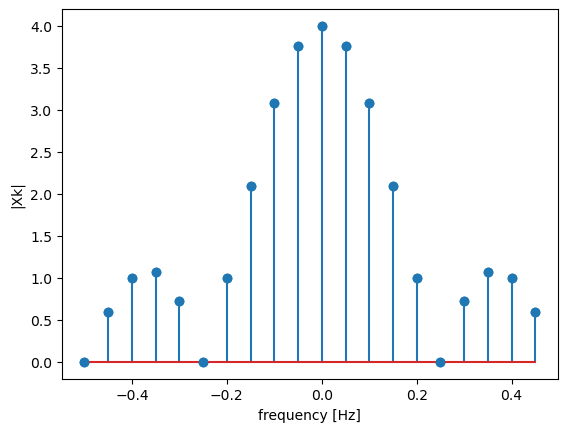

In [5]:
abs_fft_shift = np.abs(np.fft.fftshift(np.fft.fft(xt)))
freq = np.arange(-0.5, 0.5, 0.05)
plt.stem(freq, abs_fft_shift)
plt.plot(freq, abs_fft_shift, 'o')
plt.ylabel('|Xk|')
plt.xlabel('frequency [Hz]');

### Task 0.5: Showing spectrum only for positive frequencies

In practice, because of the symmetry, one typically plots only the right-hand side of the (double-sided) spectrum, hence only the part for positive frequencies $f \geq 0$. This is simply a matter of preference, and a way to save some space.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 0.5:</b>   
Can you identify what has changed (in the code and visually), compared to the previous plot?
</p>
</div>

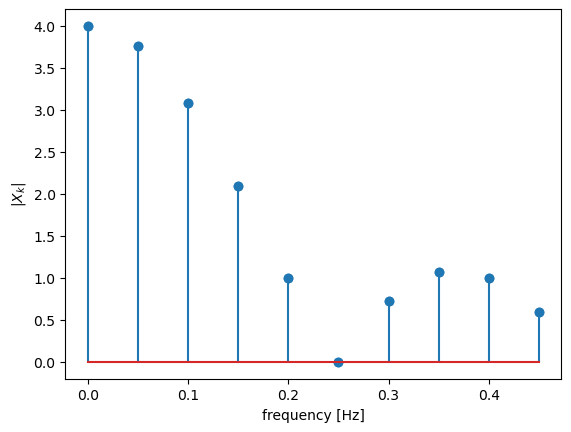

In [6]:
N=len(xt)
abs_fft = np.abs(np.fft.fft(xt))
freq = np.arange(0.0, 1.0, 0.05)
plt.plot(freq[:int(N/2)], abs_fft[:int(N/2)], 'o')
plt.stem(freq[:int(N/2)], abs_fft[:int(N/2)])
plt.ylabel('$|X_k|$')
plt.xlabel('frequency [Hz]');

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 0.6:</b>   
Confirm that you understand how we have arrived at the plot above, which illustrates the magnitude (amplitude) spectrum for frequencies $f \in [0,f_s/2)$, rather than $[0,f_s)$.
</p>
</div>

## Task 1: Application of DFT using simple cosine

It is always a good idea, in spectral analysis, to run a test with a very simple, basic signal. In this way you can test and verify your coding and interpretation of the results. 

Our basic signal is just a plain cosine. We take the amplitude equal to one, and zero initial phase, so the signal reads $x(t) = \cos(2 \pi f_c t)$, with $f_c$ = 3 Hz in this exercise. With such a simple signal, we know in advance how the spectrum should look like. Namely just a spike at $f$ = 3 Hz, and also one at $f$ = -3 Hz, as we're, for mathematical convenience, working with double sided spectra. The spectrum should be zero at all other frequencies.

As a side note: the cosine is strictly a periodic function, not a-periodic (as above); still, the Fourier transform of the cosine is defined as two Dirac delta pulses or peaks (at 3 Hz and -3 Hz). You may want to check out the second worked example in Chapter 3 on the Fourier transform: Fourier transform in the limit.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>   
    
Create a sampled (discrete time) cosine signal by sampling at $f_s$ = 10 Hz, for a duration of $T$ = 2 seconds (make sure you use exactly $N$ = 20 samples). Plot the sampled signal, compute its DFT and plot its magnitude spectrum $|X_k|$ with proper labeling of the axes (just like we did in the first part of this notebook). Include a plot of the spectrum of the sampled cosine signal using only the positive frequencies (up to $f_s/2$, as in the last plot of the previous task).

<em>Note: you are expected to produce three separate plots.</em>
</p>
</div>

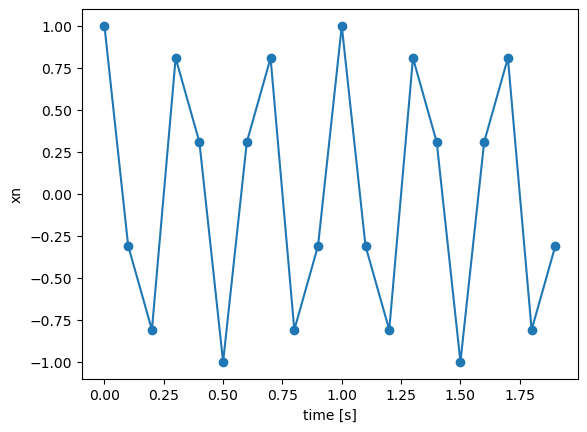

In [13]:
### SOLUTION

fc=3
fs=10
dt=1/fs
T=2
N=T*fs
t=np.arange(0,T,dt)
xt=np.cos(2*np.pi*fc*t)

plt.plot(t,xt, marker = 'o')

plt.xlabel('time [s]')
plt.ylabel('xn');

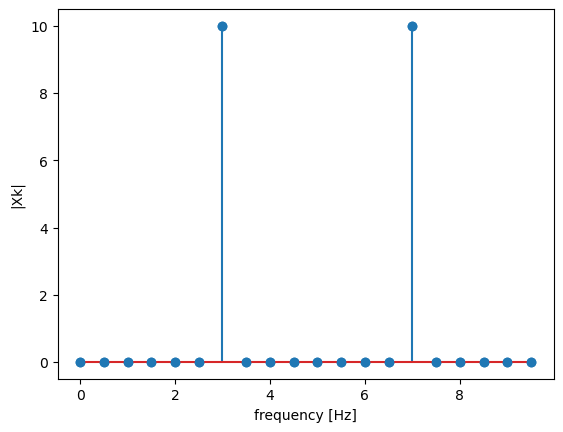

In [15]:
### SOLUTION

abs_fft = np.abs(np.fft.fft(xt))
freq=np.arange(0,fs,1/T)
plt.stem(freq, abs_fft)
plt.plot(freq, abs_fft, 'o')
plt.ylabel('|Xk|')
plt.xlabel('frequency [Hz]');

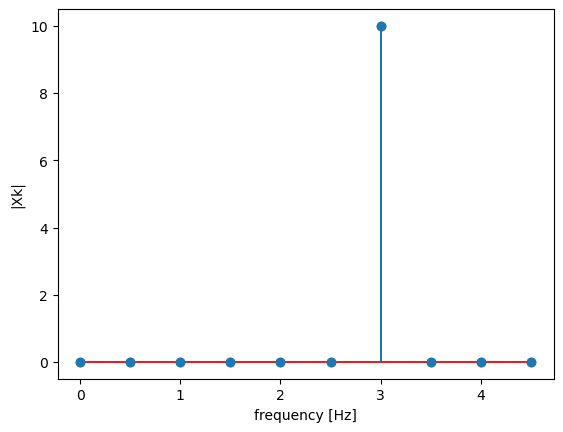

In [9]:
### SOLUTION

abs_fft = np.abs(np.fft.fft(xt))
freq=np.arange(0,fs,1/T)
plt.stem(freq[:int(N/2)], abs_fft[:int(N/2)])
plt.plot(freq[:int(N/2)], abs_fft[:int(N/2)], 'o')
plt.ylabel('|Xk|')
plt.xlabel('frequency [Hz]');

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->